In [35]:
import warnings 
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Glass Identification Dataset. It consists of 214 observations from each of seven types of glasses. Ten features were measured from each sample.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/glass+identification

**Train the KNN algorithm to be able to distinguish the type of glass from one another given the measurements of the 10 features.**

## Question 1 - 1 point

Import the data set and print 10 random rows from the data set

In [13]:
import pandas as pd
Glass = pd.read_csv("glass.csv")
Glass.head(10)

RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00     1
5  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26     1
6  1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00     1
7  1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00     1
8  1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00     1
9  1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11     1

## Data Pre-processing

## Question 2 - Check for missing values. - 1 point

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median/mean) *

In [14]:
Glass.isnull().values.any()
Glass.isnull().sum().sum()
Glass.describe()

False

0

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516523   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

## Question 3 - Create Box plots for all the independent features to check the outliers - 1 point


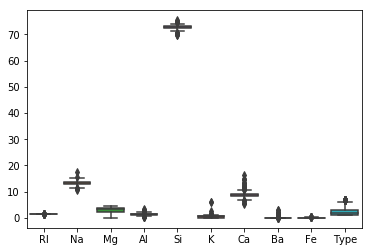

In [21]:
import seaborn as sns

sns.boxplot(data=Glass.ix[:,:])



## Question 4 - Check for Variance- 1 point

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [22]:
Glass.var() > 0.1

Glass.loc[:, Glass.var() > 0.1]


RI      False
Na       True
Mg       True
Al       True
Si       True
K        True
Ca       True
Ba       True
Fe      False
Type     True
dtype: bool

Na    Mg    Al     Si     K    Ca    Ba  Type
0    13.64  4.49  1.10  71.78  0.06  8.75  0.00     1
1    13.89  3.60  1.36  72.73  0.48  7.83  0.00     1
2    13.53  3.55  1.54  72.99  0.39  7.78  0.00     1
3    13.21  3.69  1.29  72.61  0.57  8.22  0.00     1
4    13.27  3.62  1.24  73.08  0.55  8.07  0.00     1
5    12.79  3.61  1.62  72.97  0.64  8.07  0.00     1
6    13.30  3.60  1.14  73.09  0.58  8.17  0.00     1
7    13.15  3.61  1.05  73.24  0.57  8.24  0.00     1
8    14.04  3.58  1.37  72.08  0.56  8.30  0.00     1
9    13.00  3.60  1.36  72.99  0.57  8.40  0.00     1
10   12.72  3.46  1.56  73.20  0.67  8.09  0.00     1
11   12.80  3.66  1.27  73.01  0.60  8.56  0.00     1
12   12.88  3.43  1.40  73.28  0.69  8.05  0.00     1
13   12.86  3.56  1.27  73.21  0.54  8.38  0.00     1
14   12.61  3.59  1.31  73.29  0.58  8.50  0.00     1
15   12.81  3.54  1.23  73.24  0.58  8.39  0.00     1
16   12.68  3.67  1.16  73.11  0.61  8.70  0.00     1
17   14.36  3.85  0.89  71.36  0.15  9.15  0.00     1
18   13.90  3.73  1.18  72.12  0.06  8.89  0.00     1
19   13.02  3.54  1.69  72.73  0.54  8.44  0.00     1
20   12.82  3.55  1.49  72.75  0.54  8.52  0.00     1
21   14.77  3.75  0.29  72.02  0.03  9.00  0.00     1
22   12.78  3.62  1.29  72.79  0.59  8.70  0.00     1
23   12.81  3.57  1.35  73.02  0.62  8.59  0.00     1
24   13.38  3.50  1.15  72.85  0.50  8.43  0.00     1
25   12.98  3.54  1.21  73.00  0.65  8.53  0.00     1
26   13.21  3.48  1.41  72.64  0.59  8.43  0.00     1
27   12.87  3.48  1.33  73.04  0.56  8.43  0.00     1
28   12.56  3.52  1.43  73.15  0.57  8.54  0.00     1
29   13.08  3.49  1.28  72.86  0.60  8.49  0.00     1
..     ...   ...   ...    ...   ...   ...   ...   ...
184  17.38  0.00  0.34  75.41  0.00  6.65  0.00     6
185  13.69  3.20  1.81  72.81  1.76  5.43  1.19     7
186  14.32  3.26  2.22  71.25  1.46  5.79  1.63     7
187  13.44  3.34  1.23  72.38  0.60  8.83  0.00     7
188  14.86  2.20  2.06  70.26  0.76  9.76  0.00     7
189  15.79  1.83  1.31  70.43  0.31  8.61  1.68     7
190  13.88  1.78  1.79  73.10  0.00  8.67  0.76     7
191  14.85  0.00  2.38  73.28  0.00  8.76  0.64     7
192  14.20  0.00  2.79  73.46  0.04  9.04  0.40     7
193  14.75  0.00  2.00  73.02  0.00  8.53  1.59     7
194  14.56  0.00  1.98  73.29  0.00  8.52  1.57     7
195  14.14  0.00  2.68  73.39  0.08  9.07  0.61     7
196  13.87  0.00  2.54  73.23  0.14  9.41  0.81     7
197  14.70  0.00  2.34  73.28  0.00  8.95  0.66     7
198  14.38  0.00  2.66  73.10  0.04  9.08  0.64     7
199  15.01  0.00  2.51  73.05  0.05  8.83  0.53     7
200  15.15  0.00  2.25  73.50  0.00  8.34  0.63     7
201  11.95  0.00  1.19  75.18  2.70  8.93  0.00     7
202  14.85  0.00  2.42  73.72  0.00  8.39  0.56     7
203  14.80  0.00  1.99  73.11  0.00  8.28  1.71     7
204  14.95  0.00  2.27  73.30  0.00  8.71  0.67     7
205  14.95  0.00  1.80  72.99  0.00  8.61  1.55     7
206  14.94  0.00  1.87  73.11  0.00  8.67  1.38     7
207  14.39  0.00  1.82  72.86  1.41  6.47  2.88     7
208  14.37  0.00  2.74  72.85  0.00  9.45  0.54     7
209  14.14  0.00  2.88  72.61  0.08  9.18  1.06     7
210  14.92  0.00  1.99  73.06  0.00  8.40  1.59     7
211  14.36  0.00  2.02  73.42  0.00  8.44  1.64     7
212  14.38  0.00  1.94  73.61  0.00  8.48  1.57     7
213  14.23  0.00  2.08  73.36  0.00  8.62  1.67     7

[214 rows x 8 columns]

## Question 5 - 1 point

*Plot the scatter matrix for all the variables.*


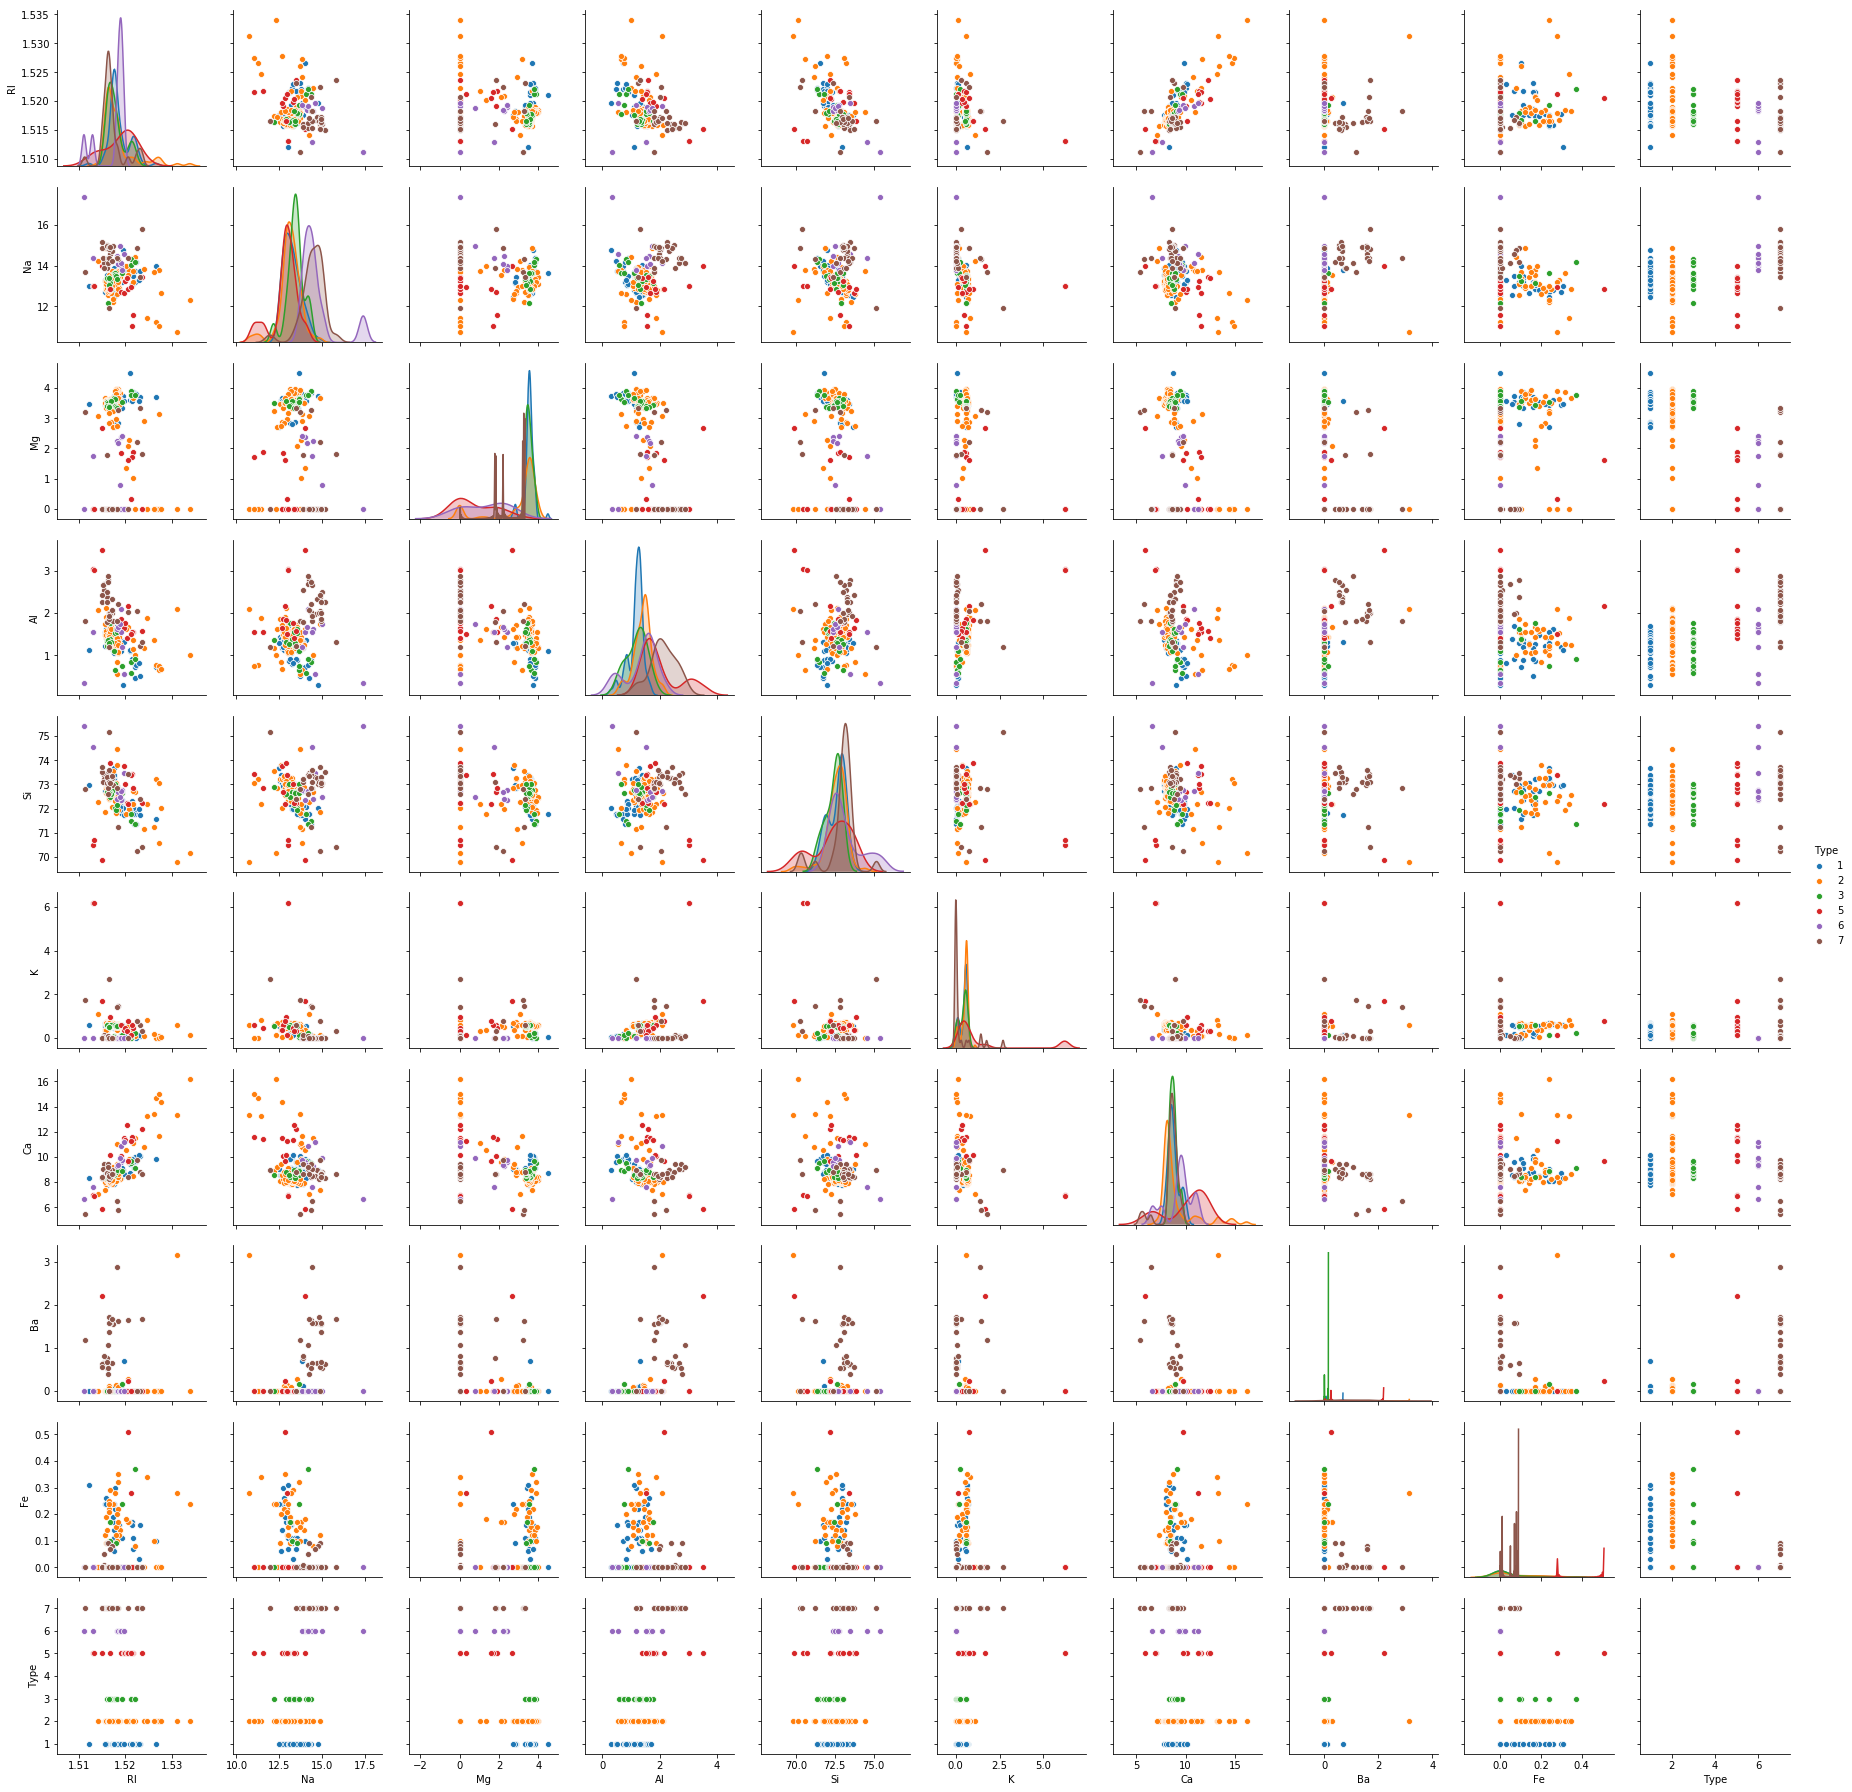

In [47]:
sns.pairplot(Glass, hue="Type")

## Question 6 - Model - 2 points

*Split the data in test and train sets and build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,6,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [55]:
Glass['Type'] = Glass.Type.astype('category')
Glass.dtypes


Glass_df = Glass.drop(labels= "Type" , axis = 1)
Glass_df.head()

RI       float64
Na       float64
Mg       float64
Al       float64
Si       float64
K        float64
Ca       float64
Ba       float64
Fe       float64
Type    category
dtype: object

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0

In [57]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
bc_feature = Glass_df.apply(zscore)
X = np.array(bc_feature)
X.shape


(214, 9)

In [58]:
bc_labels = Glass["Type"]

y = np.array(bc_labels)
y.shape


(214,)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [73]:

# Split X and y into training and test set in 70:30 ratio


NNH = KNeighborsClassifier(n_neighbors=3)
NNH.fit(X_train, y_train)
NNH.score(X_test, y_test)

predicted_labels = NNH.predict(X_test)
from sklearn import metrics

print(metrics.confusion_matrix(y_test, predicted_labels))

accuracy_score(y_test, predicted_labels, normalize=False)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

0.7384615384615385

[[20  4  1  0  0  0]
 [ 2 18  0  0  1  0]
 [ 5  2  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 0  1  0  0  0  8]]


48

In [74]:

# Split X and y into training and test set in 70:30 ratio


NNH = KNeighborsClassifier(n_neighbors=6)
NNH.fit(X_train, y_train)
NNH.score(X_test, y_test)

predicted_labels = NNH.predict(X_test)
from sklearn import metrics

print(metrics.confusion_matrix(y_test, predicted_labels)) 
accuracy_score(y_test, predicted_labels, normalize=False) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

0.7076923076923077

[[20  4  1  0  0  0]
 [ 4 15  0  0  2  0]
 [ 4  3  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  1  0  0  0  8]]


46

In [75]:

# Split X and y into training and test set in 70:30 ratio


NNH = KNeighborsClassifier(n_neighbors=9)
NNH.fit(X_train, y_train)
NNH.score(X_test, y_test)

predicted_labels = NNH.predict(X_test)
from sklearn import metrics

print(metrics.confusion_matrix(y_test, predicted_labels))
accuracy_score(y_test, predicted_labels, normalize=False) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

0.7384615384615385

[[20  4  1  0  0  0]
 [ 2 17  0  0  2  0]
 [ 3  4  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  1  0  0  0  8]]


48

## Question 7 - Cross Validation - 2 points

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

In [79]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = [1,3,5,7,8,9,11,13,15,17,19]

# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
   knn = KNeighborsClassifier(n_neighbors=k)
   scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
   cv_scores.append(scores.mean())
   k_neighbors.append(k)



best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

0.3078902714932128

1

The optimal number of neighbors is 3


Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [80]:
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))

0.3078902714932128

1

## Question 8 - 1 point

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

(0, 25)

Text(0.5,0,'Number of Neighbors K')

Text(0,0.5,'Misclassification Error')

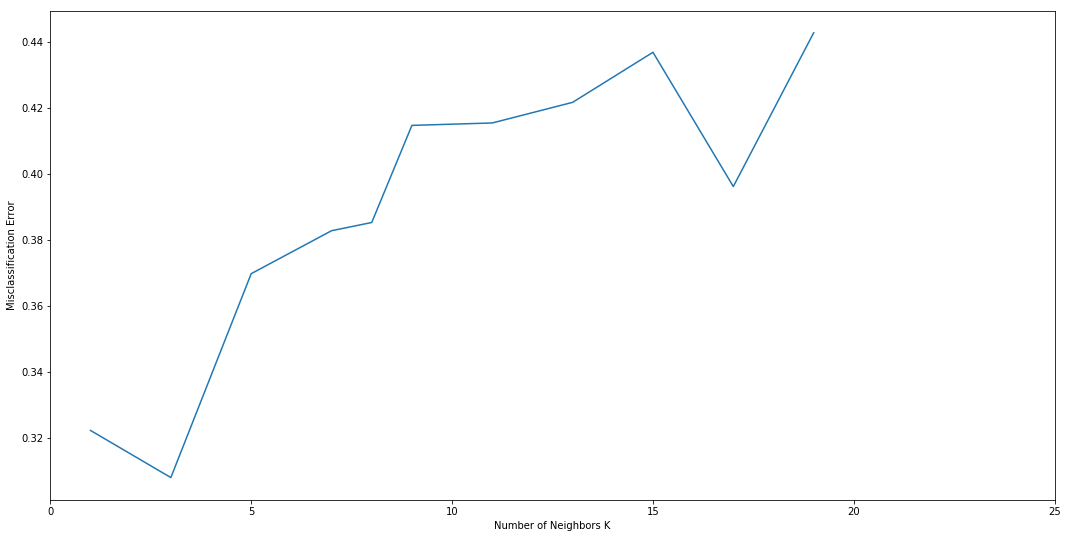

In [81]:
%matplotlib inline 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,25)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()